## Tutors - expected math exam results

#### Predict average math exam results for students of the tutors

Ваша задача в этом соревновании - предсказать средний балл на экзамене по математике,
который получают ученики репетиторов из датасета test.csv.
Вам будут даны два датасета: train.csv (содержит признаки и целевую переменную) и test.csv (только признаки)

https://www.kaggle.com/c/tutors-expected-math-exam-results

Метрика для оценки – Коэффициент детерминации:

https://en.wikipedia.org/wiki/Coefficient_of_determination

\[ R^2 = 1 - \frac{\sigma^2}{\sigma_y^2} \]



You can only use these imports:
``` python
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
```

### План
 - Анализ предметной области
 - Очистка и форматирование данных.
 - Разведочный анализ данных.
 - Конструирование и выбор признаков.
 - Сравнение метрик нескольких моделей машинного обучения.
 - Гиперпараметрическая настройка лучшей модели.
 - Оценка лучшей модели на тестовом наборе данных.
 - Интерпретирование результатов работы модели.

### Анализ предметной области

Профиль учителя включает (гипотеза! в постановке задачи не найдено):

- **age** - Возраст
- **years_of_experience** - Количество лет в профессии
- **lesson_price** - Стоимость урока
- **qualification** - Квалификация
- **physics** **chemistry**	**biology**	**english**	**geography** **history** - дополнительная квалификация
- **mean_exam_points** - средний балл (целевая переменная)

Наибольшие вопросы вызывают поля доп квалификации **physics** **chemistry**	**biology**	**english**	**geography** **history**.
Можно предположить что доп квалификация в предметах **physics** **chemistry** должна коррелировать с преподаванием математики
И следовательно, влиять на целевую переменную.

>#### Гипотеза-01-EXT
Проверить корреляцию признаков **physics** **chemistry** на целевую переменную

>#### Гипотеза-02-0EXT
Удалить признаки **biology**	**english**	**geography** **history**

### Очистка и форматирование данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [338]:
TRAIN_DATASET_PATH = 'data/train.csv'
TEST_DATASET_PATH = 'data/test.csv'
SAMPLE_PATH = 'data/submission_example.csv'
TARGET_NAME = 'mean_exam_points'

In [156]:
train = pd.read_csv(TRAIN_DATASET_PATH)
test = pd.read_csv(TEST_DATASET_PATH)

In [157]:
train.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


> Удаляем лишние переменные

In [15]:
train.drop(columns='Id', inplace=True)
train

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,44.0,0.0,1700.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,78.0
9996,51.0,0.0,1700.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0
9997,34.0,1.0,1250.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0
9998,33.0,3.0,1100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  float64
 1   years_of_experience  10000 non-null  float64
 2   lesson_price         10000 non-null  float64
 3   qualification        10000 non-null  float64
 4   physics              10000 non-null  float64
 5   chemistry            10000 non-null  float64
 6   biology              10000 non-null  float64
 7   english              10000 non-null  float64
 8   geography            10000 non-null  float64
 9   history              10000 non-null  float64
 10  mean_exam_points     10000 non-null  float64
dtypes: float64(11)
memory usage: 859.5 KB


In [10]:
train.describe().T


,count,mean,std,min,25%,50%,75%,max
Id,10000.0,4999.5000,2886.895680,0.0,2499.75,4999.5,7499.25,9999.0
age,10000.0,45.8780,8.043929,23.0,40.00,46.0,51.00,68.0
years_of_experience,10000.0,1.9868,1.772213,0.0,0.00,2.0,3.00,10.0
lesson_price,10000.0,1699.1050,524.886654,200.0,1300.00,1500.0,2150.00,3950.0
qualification,10000.0,1.7195,0.792264,1.0,1.00,2.0,2.00,4.0
physics,10000.0,0.3750,0.484147,0.0,0.00,0.0,1.00,1.0
chemistry,10000.0,0.1329,0.339484,0.0,0.00,0.0,0.00,1.0
biology,10000.0,0.1096,0.312406,0.0,0.00,0.0,0.00,1.0
english,10000.0,0.0537,0.225436,0.0,0.00,0.0,0.00,1.0
geography,10000.0,0.0321,0.176274,0.0,0.00,0.0,0.00,1.0


In [19]:
train.isnull().sum()

age                    0
years_of_experience    0
lesson_price           0
qualification          0
physics                0
chemistry              0
biology                0
english                0
geography              0
history                0
mean_exam_points       0
dtype: int64

> пропуски отсутствуют


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

### Разведочный анализ данных


In [27]:
# первый взгляд на параметр
def first_look(Series1, max_count=0, bins=10, quan=0.999, is_correct_outlier=False, is_show_stat=False):
    Series = Series1.copy()
    # простая корректировка по выбросам
    if is_correct_outlier:
        Series.drop(Series[Series > Series.quantile(quan)].index, inplace=True)
    # расчет основных значений
    Series_mean = round(Series.mean(), 2)
    Series_median = Series.median()
    Series_name = Series.name
    # расчет максимального выброса
    max_count = np.histogram(Series, bins=bins)[0].max()

    plt.figure(figsize=(16, 8))
    Series.hist(bins=bins)
    plt.ylabel('Count')
    plt.xlabel(Series_name)
    # отображение среднего и медианы
    y = np.linspace(0, max_count, bins)
    plt.plot([Series_mean] * bins, y, label='mean  : {:,.2f}'.format(Series_mean), linewidth=4)
    plt.plot([Series_median] * bins, y, label='median: {:,.2f}'.format(Series_median), linewidth=4)
    plt.legend()
    plt.title(Series_name + ' distribution')
    plt.show()
    if is_show_stat:
        print(Series.describe())

#### Признак **mean_exam_points** - средний балл (целевая переменная)

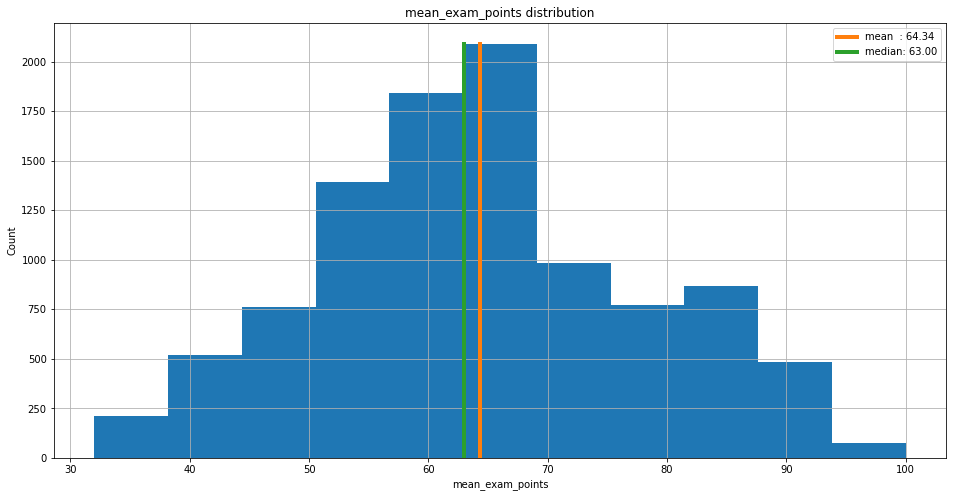

count    10000.000000
mean        64.340800
std         13.536823
min         32.000000
25%         55.000000
50%         63.000000
75%         73.000000
max        100.000000
Name: mean_exam_points, dtype: float64


In [105]:
first_look(train.mean_exam_points, bins=11, is_show_stat=True)

> Значения признака **mean_exam_points** находятся в пределах экзаменационных оценок. Выбросы отсутствуют.
> Количество оценок при росте значения падают.


#### Признак age - возраст


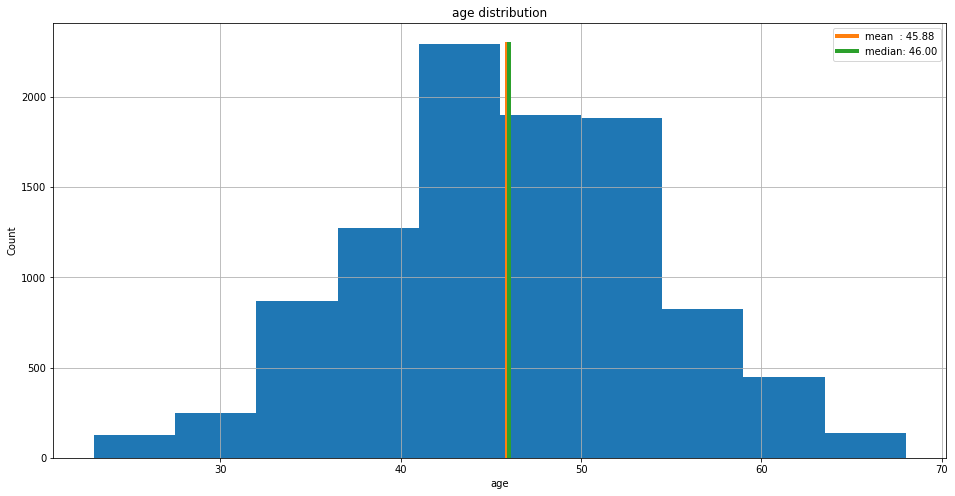

count    10000.000000
mean        45.878000
std          8.043929
min         23.000000
25%         40.000000
50%         46.000000
75%         51.000000
max         68.000000
Name: age, dtype: float64


In [28]:
first_look(train.age, is_show_stat=True)


> Значения признака **age** соответствует возрасту человека. Выбросы отсутствуют. Медианное значение - 46 лет.

#### Признак **years-of-experience** - Количество лет в профессии

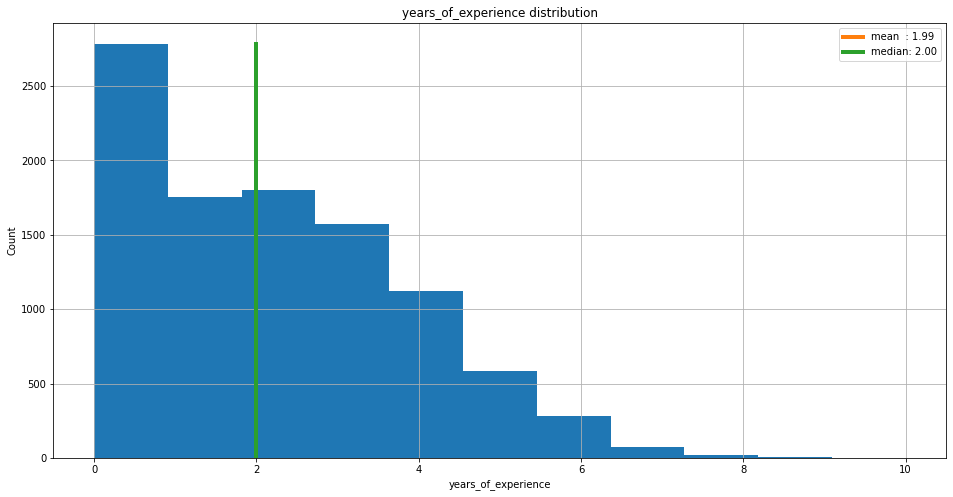

count    10000.000000
mean         1.986800
std          1.772213
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: years_of_experience, dtype: float64


In [46]:
first_look(train.years_of_experience, bins=11, is_show_stat=True)

In [48]:
train[train.years_of_experience == 0].count()[0], train[train.years_of_experience == 0].count()[0] / train.count()[0]


(2785, 0.2785)

> Значения признака **years_of_experience** В целом соответсвуют предметной области. Однако довольно много значений
> с нулевым значением (2700), это около 30% от всех данных
>

>#### Гипотеза-03-EXP-LOW
Признак **years_of_experience** иммее 30% нулевых значений - мало опыта?
Выделить в отдельную категорию с years_of_experience=0

>#### Гипотеза-04-EXP-BL
Признак **years_of_experience** иммее 30% нулевых значений - не заполнен?



#### Признак **lesson_price** - Стоимость урока


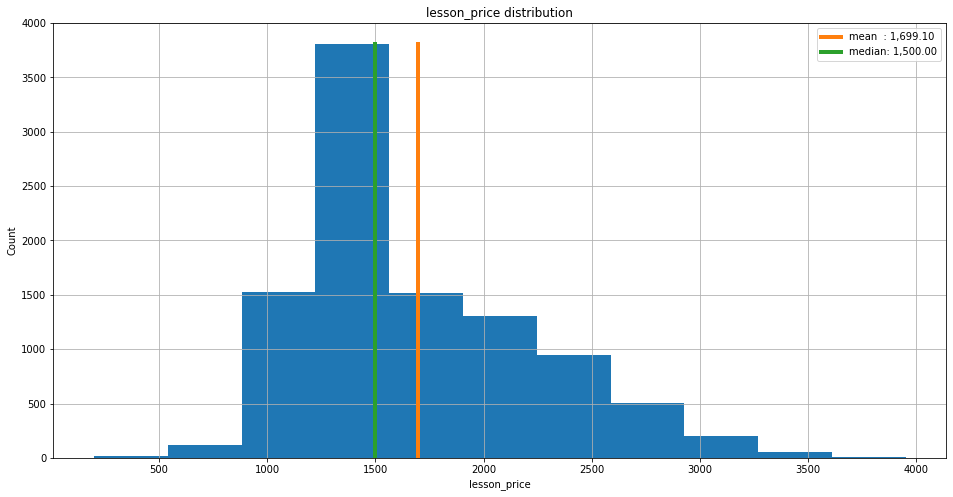

count    10000.000000
mean      1699.105000
std        524.886654
min        200.000000
25%       1300.000000
50%       1500.000000
75%       2150.000000
max       3950.000000
Name: lesson_price, dtype: float64


In [43]:
first_look(train.lesson_price, bins=11, is_show_stat=True)


In [45]:
train[train.lesson_price < 1000].count()[0], train[train.lesson_price < 1000].count()[0] / train.count()[0]

(238, 0.0238)

> Значения признака **lesson_price** В целом соответствуют предметной области. Однако стоимость урока меньше 1000 может
> быть указана ошибочно или, например, в рекламных целях. Таких значений 2%.
>


#### Признак **qualification** - Квалификация

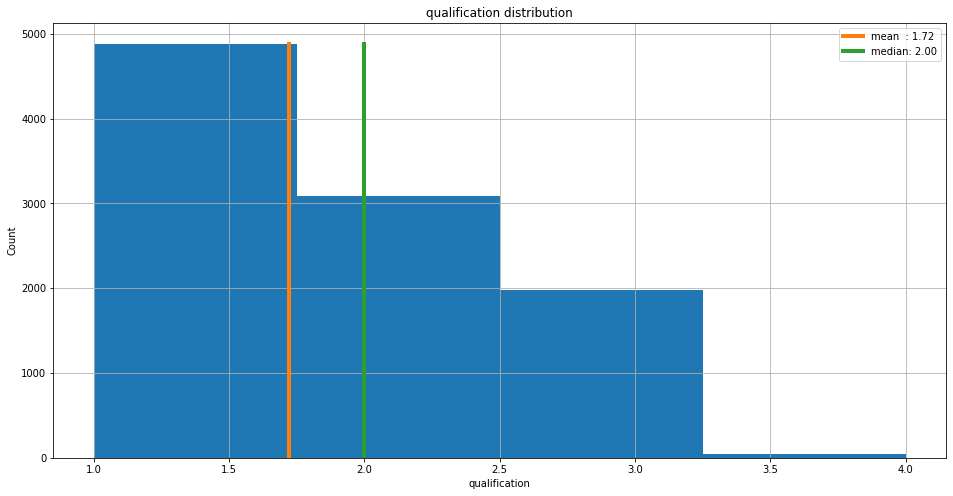

In [115]:
first_look(train.qualification, bins=4)

In [53]:
train.qualification.value_counts()

1.0    4884
2.0    3087
3.0    1979
4.0      50
Name: qualification, dtype: int64

**Точечный анализ: признаки возраст, средний балл при квалификации равной 4**

***Исходные данные***

In [106]:
train.describe().loc[:, ['age', 'mean_exam_points']].T


,count,mean,std,min,25%,50%,75%,max
age,10000.0,45.8780,8.043929,23.0,40.0,46.0,51.0,68.0
mean_exam_points,10000.0,64.3408,13.536823,32.0,55.0,63.0,73.0,100.0


***Фильтр по высшей квалификации***

In [111]:
train[train.qualification == 4].describe().loc[:, ['age', 'mean_exam_points']].T

,count,mean,std,min,25%,50%,75%,max
age,50.0,45.90,8.490691,25.0,41.0,45.0,51.0,62.0
mean_exam_points,50.0,84.66,4.574151,76.0,81.0,84.0,87.0,94.0


> Вывод: в области объектов с высоким значением признака квалификации значение средней
> оценки увеличилось с 64 до 85. Это говорит о сильной корреляции. При этом влияние возраста практически отсутсвует.

#### Признаки **physics** **chemistry**	**biology**	**english**	**geography** **history** - дополнительная квалификация

In [114]:
train.loc[:, ['physics', 'chemistry', 'biology', 'english', 'geography', 'history']].sum()

physics      3750.0
chemistry    1329.0
biology      1096.0
english       537.0
geography     321.0
history       194.0
dtype: float64

> Признаков приличное количество, поэтому проверка корреляции может иметь существенное значение

>#### Гипотеза-01-EXT
Проверить корреляцию признаков **physics** **chemistry** на целевую переменную

### Конструирование и выбор признаков.


> Проверим связь признаков (корреляцию) с целевой переменной.
>

In [126]:
correlations_data = train.corr()['mean_exam_points'].sort_values()
correlations_data

age                   -0.007646
history               -0.000113
english                0.013174
geography              0.014401
chemistry              0.017825
biology                0.023022
physics                0.187726
years_of_experience    0.205417
lesson_price           0.721179
qualification          0.755963
mean_exam_points       1.000000
Name: mean_exam_points, dtype: float64

> Отфильтруем, те признаки влияние которых меньше 5%

In [134]:
correlations_data.where(correlations_data < 0.05)

age                   -0.007646
history               -0.000113
english                0.013174
geography              0.014401
chemistry              0.017825
biology                0.023022
physics                     NaN
years_of_experience         NaN
lesson_price                NaN
qualification               NaN
mean_exam_points            NaN
Name: mean_exam_points, dtype: float64

>#### Гипотеза-05-DEL
> Удалить признаки которые, не влияют на целевую переменную.

>age, history, english, geography, chemistry, biology


### Анализ влияния признаков на целевую переменную

> Проведем анализ влияния каждого признака на целевую переменную

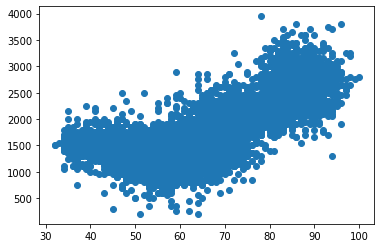

In [150]:
plt.scatter(train.mean_exam_points, train.lesson_price)

> Целевая переменная имеет сильную значимую линейную зависимость от признака стоимость урока

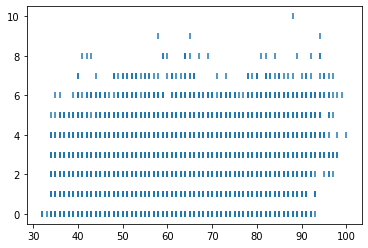

In [151]:
plt.scatter(train.mean_exam_points, train.years_of_experience, marker='|')

> Целевая переменная имеет **слабую** значимую линейную зависимость от признака количества лет опыта

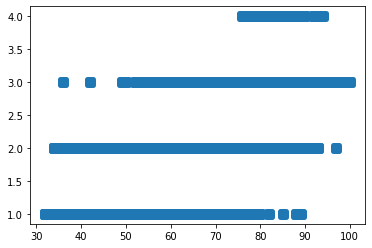

In [152]:
plt.scatter(train.mean_exam_points, train.qualification, marker='s', linewidths=5)

> Целевая переменная имеет **небольшую** значимую линейную зависимость от признака оценка квалификации


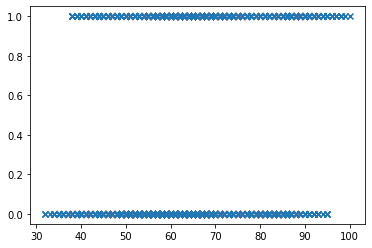

In [153]:
plt.scatter(train.mean_exam_points, train.physics, marker='x')


**Вывод:** При анализе выборочных (2-мерных) зависимостей слабо проявляется связь целевой переменной с признаками. Кроме того,
признаки *оценка квалификации* и *преподование физики* имеют дискретный характер.

**Вывод:** На дискретных признаках хорошо работают алгоритмы основанные на деревьях решений. Однако линейные модели
исключать не будем


### Сравнение метрик нескольких моделей машинного обучения.


#### Линейная модель с обучением при помощи градиентного спуска

In [456]:
def r2(x, y):
    correlation_matrix = np.corrcoef(x, y)
    correlation_xy = correlation_matrix[0, 1]
    r_squared = correlation_xy ** 2
    return r_squared

In [160]:
def calc_mse(y_orig, y_pred, w=0, tetta=0):
    calc_err = np.mean((y_orig - y_pred) ** 2)
    return calc_err

In [381]:
class LogGD:
    Way = []
    Err = []
    W = []
    iteration = 0
    alpha = 0
    theta = 0

    def __init__(self, iteration=100, alpha=1e-4, theta=0.1):
        self.Way = []
        self.Err = []
        self.W = []
        self.iteration = 0
        self.set_params(iteration=iteration, alpha=alpha, theta=theta)
        pass

    def set_params(self, iteration=100, alpha=1e-4, theta=0.1):
        self.iteration = iteration
        self.alpha = alpha
        self.theta = theta

    def fit(self, X, y):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        w = np.random.randn(X.shape[1])
        n = X.shape[0]
        for i in range(1, self.iteration + 1):
            y_pred = np.dot(w, X.T)
            err = self.calc_mse(y, y_pred, w=w, theta=self.theta)
            w -= (self.alpha * (1 / n * 2 * np.dot((y_pred - y), X)))
            self.Way.append([i, w])
            self.Err.append([err])
        self.W = w

    def calc_mse(self, y_orig, y_pred, w=0, theta=0):
        calc_err = np.mean((y_orig - y_pred) ** 2)
        return calc_err

    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        y_pred = np.dot(self.W, X.T)
        return y_pred

Заготовка Pipe line для установки на проде

In [430]:
class DataPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians = None

    def fit(self, X):
        pass

    def transform(self, X):
        """Трансформация данных"""
        X.loc[:, 'new_lesson_price'] = X['lesson_price'] / 1000
        X.loc[:, 'new_age'] = X['age'] / 10

        return X

In [431]:
from sklearn.model_selection import train_test_split


Отбор переменных

In [500]:
NUM_FEATURE_NAMES = [
    # 'age', # -> new_age
    'years_of_experience',
    # 'lesson_price', # -> new_lesson_price
    'qualification',
    'physics',
    # 'chemistry', 'biology', 'english', 'geography', 'history'
]

NEW_FEATURE_NAMES = ['new_lesson_price', 'new_age']

SELECTED_FEATURE_NAMES = NUM_FEATURE_NAMES + NEW_FEATURE_NAMES

Чтение данных и формирование отложенной выборки

In [501]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)

X = train_df.drop(columns=TARGET_NAME)
y = train_df[TARGET_NAME]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=13)

Обработка данных

In [502]:
preprocessor = DataPreprocessing()
preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
test_df = preprocessor.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

c:\projects\geekbrainsai\gb_data_analysis\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


((6700, 13), (3300, 13), (10000, 13))

Отбор переменных

In [503]:
X_train = X_train[SELECTED_FEATURE_NAMES]
X_valid = X_valid[SELECTED_FEATURE_NAMES]
test_df = test_df[SELECTED_FEATURE_NAMES]

In [504]:
X_train

,years_of_experience,qualification,physics,new_lesson_price,new_age
962,2.0,2.0,1.0,1.35,6.0
3505,0.0,1.0,0.0,1.50,3.7
9654,3.0,2.0,0.0,1.95,5.5
8303,2.0,2.0,1.0,2.00,3.3
497,0.0,1.0,1.0,1.25,3.7
...,...,...,...,...,...
5876,3.0,2.0,1.0,1.45,5.5
866,1.0,1.0,0.0,1.30,4.4
7696,3.0,1.0,1.0,1.05,3.7
74,0.0,1.0,0.0,1.20,5.2


Запуск обучения, подбор гиперпараметров

In [437]:
loggd = LogGD(iteration=15000, alpha=1e-4)
loggd.fit(X_train, y_train)
loggd.predict(X_valid)

array([52.30996437, 67.45972506, 67.08657416, ..., 67.72311428,
       42.17169092, 51.49254809])

Контроль обучения, переобучения

In [457]:
r2(y_train, loggd.predict(X_train)), r2(y_valid, loggd.predict(X_valid))

(0.5593537988984921, 0.5551065847600533)

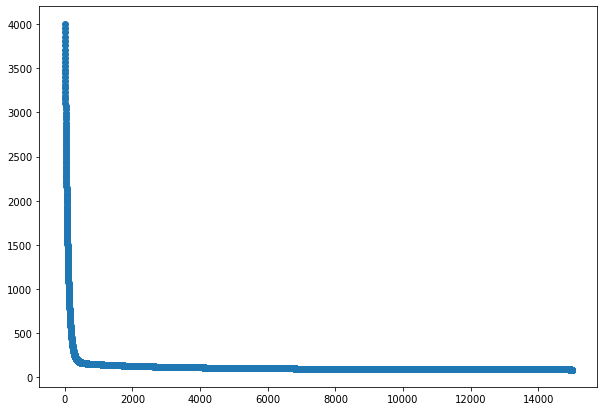

In [440]:
plt.figure(figsize=(10, 7))
plt.scatter(list(range(0, loggd.iteration)), loggd.Err)

In [441]:
prediction = loggd.predict(test_df)
prediction.shape

(10000,)

In [442]:
submit = pd.read_csv(SAMPLE_PATH)
submit.head()

,Id,mean_exam_points
0,10000,50.0
1,10001,50.0
2,10002,50.0
3,10003,50.0
4,10004,50.0


In [443]:
submit['mean_exam_points'] = prediction
submit.head()

,Id,mean_exam_points
0,10000,50.085061
1,10001,65.216800
2,10002,60.163405
3,10003,96.053249
4,10004,90.284441


In [444]:
submit.to_csv('./rf_submit.csv', index=False)

> **Вывод** Линейная модель не достаточно улавливает закономерности в наборе признаков.
> Возможно это нелинейная зависимость.
> Максимально достижимый результат около 0.60 (R2) при отсутствии переобучения.

#### Модель на основе дерева принятия решения

In [473]:
class TreeReg():
    def __init__(self, Y: list, X: pd.DataFrame,
                 min_samples_split=20, max_depth=5, depth=None, node_type=None, rule=None):
        self.Y = Y
        self.X = X

        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

        self.depth = depth if depth else 0

        # Extracting all the features
        self.features = list(self.X.columns)

        self.node_type = node_type if node_type else 'root'
        self.rule = rule if rule else ""
        self.ymean = np.mean(Y)
        self.residuals = self.Y - self.ymean
        self.mse = self.get_mse(Y, self.ymean)

        # Saving the number of observations in the node
        self.n = len(Y)

        self.left = None
        self.right = None
        self.best_feature = None
        self.best_value = None

    @staticmethod
    def get_mse(ytrue, yhat) -> float:
        n = len(ytrue)
        r = ytrue - yhat
        r = r ** 2
        r = np.sum(r)
        return r / n

    @staticmethod
    def ma(x: np.array, window: int) -> np.array:
        return np.convolve(x, np.ones(window), 'valid') / window

    def best_split(self) -> tuple:
        df = self.X.copy()
        df['Y'] = self.Y

        # Getting the GINI impurity for the base input
        mse_base = self.mse

        best_feature = None
        best_value = None

        for feature in self.features:
            # Droping missing values
            Xdf = df.dropna().sort_values(feature)

            xmeans = self.ma(Xdf[feature].unique(), 2)

            for value in xmeans:
                # Getting the left and right ys
                left_y = Xdf[Xdf[feature] < value]['Y'].values
                right_y = Xdf[Xdf[feature] >= value]['Y'].values

                # Getting the means
                left_mean = np.mean(left_y)
                right_mean = np.mean(right_y)

                # Getting the left and right residuals
                res_left = left_y - left_mean
                res_right = right_y - right_mean

                # Concatenating the residuals
                r = np.concatenate((res_left, res_right), axis=None)

                # Calculating the mse
                n = len(r)
                r = r ** 2
                r = np.sum(r)
                mse_split = r / n

                # Checking if this is the best split so far
                if mse_split < mse_base:
                    best_feature = feature
                    best_value = value

                    # Setting the best gain to the current one
                    mse_base = mse_split

        return (best_feature, best_value)

    def fit(self):
        df = self.X.copy()
        df['Y'] = self.Y

        # If there is GINI to be gained, we split further
        if (self.depth < self.max_depth) and (self.n >= self.min_samples_split):

            # Getting the best split
            best_feature, best_value = self.best_split()

            if best_feature is not None:
                # Saving the best split to the current node
                self.best_feature = best_feature
                self.best_value = best_value

                # Getting the left and right nodes
                left_df, right_df = df[df[best_feature] <= best_value].copy(), df[df[best_feature] > best_value].copy()

                # Creating the left and right nodes
                left = TreeReg(
                    left_df['Y'].values.tolist(),
                    left_df[self.features],
                    depth=self.depth + 1,
                    max_depth=self.max_depth,
                    min_samples_split=self.min_samples_split,
                    node_type='left_node',
                    rule=f"{best_feature} <= {round(best_value, 3)}"
                )

                self.left = left
                self.left.fit()

                right = TreeReg(
                    right_df['Y'].values.tolist(),
                    right_df[self.features],
                    depth=self.depth + 1,
                    max_depth=self.max_depth,
                    min_samples_split=self.min_samples_split,
                    node_type='right_node',
                    rule=f"{best_feature} > {round(best_value, 3)}"
                )

                self.right = right
                self.right.fit()

    def predict(self, X: pd.DataFrame):

        predictions = []

        for _, x in X.iterrows():
            values = {}
            for feature in self.features:
                values.update({feature: x[feature]})

            predictions.append(self.predict_obs(values))

        return predictions

    def predict_obs(self, values: dict) -> int:
        cur_node = self
        while cur_node.depth < cur_node.max_depth:
            # Traversing the nodes all the way to the bottom
            best_feature = cur_node.best_feature
            best_value = cur_node.best_value

            if cur_node.n < cur_node.min_samples_split:
                break

            if (values.get(best_feature) < best_value):
                if self.left is not None:
                    cur_node = cur_node.left
            else:
                if self.right is not None:
                    cur_node = cur_node.right

        return cur_node.ymean

In [492]:
y_train

962     64.0
3505    43.0
9654    75.0
8303    81.0
497     55.0
        ... 
5876    41.0
866     47.0
7696    69.0
74      54.0
338     50.0
Name: mean_exam_points, Length: 6700, dtype: float64

In [505]:
tree = TreeReg(y_train, X_train, max_depth=8, min_samples_split=3)

tree.fit()

c:\projects\geekbrainsai\gb_data_analysis\venv\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\projects\geekbrainsai\gb_data_analysis\venv\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [506]:
y_train_pred = tree.predict(X_train)
y_valid_pred = tree.predict(X_valid)

In [507]:
r2(y_train, y_train_pred), r2(y_valid, y_valid_pred)


(0.8078955921529571, 0.7623158074449066)

In [508]:
prediction = tree.predict(test_df)
len(prediction)

10000

In [509]:
submit = pd.read_csv(SAMPLE_PATH)
submit.head()

,Id,mean_exam_points
0,10000,50.0
1,10001,50.0
2,10002,50.0
3,10003,50.0
4,10004,50.0


In [510]:
submit['mean_exam_points'] = prediction
submit.head()

,Id,mean_exam_points
0,10000,54.636580
1,10001,65.781250
2,10002,47.880000
3,10003,91.166667
4,10004,89.053333


In [511]:
submit.to_csv('./tr_submit.csv', index=False)
